In [1]:
# Import libraries
## Basic libs
import pandas as pd
import numpy as np
import warnings
## Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

## Metric
from sklearn import metrics

# Configure libraries
warnings.filterwarnings('ignore')
plt.rc('font', family='NanumBarunGothic') 
plt.rcParams['figure.figsize'] = (10, 10)
plt.style.use('seaborn')

# Import training, test dataset

## Training dataset

target 0: Not the best location

target 1: The best location

In [2]:
df = pd.read_csv('/content/train.csv')
df = df.drop('Unnamed: 0',axis=1)

In [3]:
df.head()

,면적,반려동물 가구밀도,폐사안락사 비율(폐사안락사 수/면적),보호소 밀도,동물병원약국개수,동물병원약국 밀도,target
0,1.34,1536.823881,11.194030,0.746269,11,8.208955,0
1,0.96,2583.450000,13.541667,1.041667,11,11.458333,0
2,1.13,2021.607080,16.814159,0.884956,10,8.849558,1
3,0.40,2389.237500,0.000000,0.000000,2,5.000000,0
4,2.52,1003.252381,0.000000,0.000000,14,5.555556,0


In [4]:
# we have imbalanced dataset
df['target'].value_counts()

0    389
1     36
Name: target, dtype: int64

In [5]:
# Select Features
feature = df.drop('target', axis=1)

# Select Target
target = df['target']

# Set Training and Testing Data
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(feature , target, 
                                                    shuffle = True, 
                                                    test_size=0.2, 
                                                    random_state=42)

# Show the Training and Testing Data
print('Shape of training feature:', X_train.shape)
print('Shape of validation feature:', X_val.shape)
print('Shape of training label:', y_train.shape)
print('Shape of validation label:', y_val.shape)

Shape of training feature: (340, 6)
Shape of validation feature: (85, 6)
Shape of training label: (340,)
Shape of validation label: (85,)


## Test dataset

In [6]:
df_test = pd.read_csv('/content/test.csv')
gu_list = df_test['서울시 구']

In [7]:
num_cols = ['면적', '반려동물 가구밀도', '폐사안락사 비율', '보호소 밀도', '동물병원약국개수',
       '동물병원약국 밀도']
X_test = df_test[num_cols]
X_test.head()

,면적,반려동물 가구밀도,폐사안락사 비율,보호소 밀도,동물병원약국개수,동물병원약국 밀도
0,18,3068.500000,20.500000,1.444444,207,11.500000
1,14,2284.857143,0.428571,0.357143,101,7.214286
2,8,2313.625000,0.000000,0.000000,58,7.250000
3,30,1659.500000,0.000000,0.000000,144,4.800000
4,17,697.058824,14.294118,0.941176,111,6.529412


In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_scaled_train = scaler.transform(X_train)
X_scaled_val = scaler.transform(X_val)
X_scaled_test = scaler.transform(X_test)

# Training

In [9]:
def evaluate_model(model, x_test, y_test):
    # Predict Test Data 
    y_pred = model.predict(x_test)

    # Calculate accuracy, precision, recall, and f1-score
    acc = metrics.accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred)
    rec = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)

    # Calculate area under curve (AUC)
    y_pred_proba = model.predict_proba(x_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)

    # Display confussion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)

    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1, 
            'fpr': fpr, 'tpr': tpr, 'auc': auc, 'cm': cm}

# Classification Model

# Logistic Regression

In [10]:
from sklearn.linear_model import LogisticRegression

# Building Logistic Regression model 
lr = LogisticRegression(random_state=42)
lr.fit(X_scaled_train, y_train)

# Evaluate Model
lr_eval = evaluate_model(lr, X_scaled_val, y_val)

# Print result
print('Accuracy:', lr_eval['acc'])
print('Precision:', lr_eval['prec'])
print('Recall:', lr_eval['rec'])
print('F1 Score:', lr_eval['f1'])
print('Area Under Curve:', lr_eval['auc'])
print('Confusion Matrix:\n', lr_eval['cm'])

Accuracy: 0.8588235294117647
Precision: 0.2
Recall: 0.1111111111111111
F1 Score: 0.14285714285714285
Area Under Curve: 0.9254385964912281
Confusion Matrix:
 [[72  4]
 [ 8  1]]


# Decision Tree

In [11]:
from sklearn import tree

# Building Decision Tree model 
dtc = tree.DecisionTreeClassifier(random_state=42)
dtc.fit(X_scaled_train, y_train)

# Evaluate Model
dtc_eval = evaluate_model(dtc, X_scaled_val, y_val)

# Print result
print('Accuracy:', dtc_eval['acc'])
print('Precision:', dtc_eval['prec'])
print('Recall:', dtc_eval['rec'])
print('F1 Score:', dtc_eval['f1'])
print('Area Under Curve:', dtc_eval['auc'])
print('Confusion Matrix:\n', dtc_eval['cm'])

Accuracy: 0.9294117647058824
Precision: 0.6363636363636364
Recall: 0.7777777777777778
F1 Score: 0.7000000000000001
Area Under Curve: 0.8625730994152047
Confusion Matrix:
 [[72  4]
 [ 2  7]]


# Random Forest

In [12]:
from sklearn.ensemble import RandomForestClassifier

# Building Random Forest model 
rf = RandomForestClassifier(random_state=42)
rf.fit(X_scaled_train, y_train)

# Evaluate Model
rf_eval = evaluate_model(rf, X_scaled_val, y_val)

# Print result
print('Accuracy:', rf_eval['acc'])
print('Precision:', rf_eval['prec'])
print('Recall:', rf_eval['rec'])
print('F1 Score:', rf_eval['f1'])
print('Area Under Curve:', rf_eval['auc'])
print('Confusion Matrix:\n', rf_eval['cm'])

Accuracy: 0.9294117647058824
Precision: 1.0
Recall: 0.3333333333333333
F1 Score: 0.5
Area Under Curve: 0.9597953216374269
Confusion Matrix:
 [[76  0]
 [ 6  3]]


# KNN

In [13]:
from sklearn.neighbors import KNeighborsClassifier

# Building KNN model 
knn = KNeighborsClassifier()
knn.fit(X_scaled_train, y_train)

# Evaluate Model
knn_eval = evaluate_model(knn, X_scaled_val, y_val)

# Print result
print('Accuracy:', knn_eval['acc'])
print('Precision:', knn_eval['prec'])
print('Recall:', knn_eval['rec'])
print('F1 Score:', knn_eval['f1'])
print('Area Under Curve:', knn_eval['auc'])
print('Confusion Matrix:\n', knn_eval['cm'])

Accuracy: 0.9058823529411765
Precision: 0.5714285714285714
Recall: 0.4444444444444444
F1 Score: 0.5
Area Under Curve: 0.8837719298245613
Confusion Matrix:
 [[73  3]
 [ 5  4]]


# Model Comparison

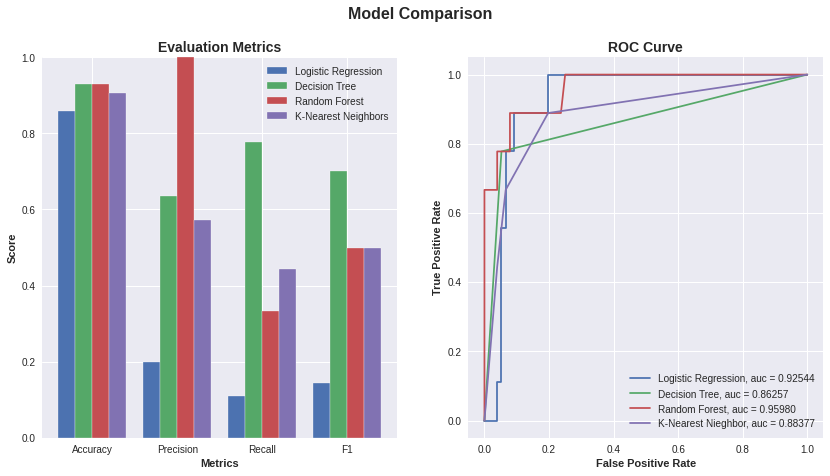

In [14]:
# Initialize figure with two plots
fig,(ax1,ax2)=plt.subplots(1,2)
fig.suptitle('Model Comparison', fontsize=16,fontweight='bold')
fig.set_figheight(7)
fig.set_figwidth(14)
fig.set_facecolor('white')

# First plot
## set bar size
barWidth = 0.2
lr_score = [lr_eval['acc'], lr_eval['prec'], lr_eval['rec'], lr_eval['f1']]
dtc_score = [dtc_eval['acc'], dtc_eval['prec'], dtc_eval['rec'], dtc_eval['f1']]
rf_score = [rf_eval['acc'], rf_eval['prec'], rf_eval['rec'], rf_eval['f1']]
knn_score = [knn_eval['acc'], knn_eval['prec'], knn_eval['rec'], knn_eval['f1']]

## Set position of bar on X axis
r1 = np.arange(len(dtc_score))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]

## Make the plot
ax1.bar(r1, lr_score, width=barWidth, edgecolor='white', label='Logistic Regression')
ax1.bar(r2, dtc_score, width=barWidth, edgecolor='white', label='Decision Tree')
ax1.bar(r3, rf_score, width=barWidth, edgecolor='white', label='Random Forest')
ax1.bar(r4, knn_score, width=barWidth, edgecolor='white', label='K-Nearest Neighbors')

## Configure x and y axis
ax1.set_xlabel('Metrics', fontweight='bold')
labels = ['Accuracy', 'Precision', 'Recall', 'F1']
ax1.set_xticks([r + (barWidth * 1.5) for r in range(len(dtc_score))], )
ax1.set_xticklabels(labels)
ax1.set_ylabel('Score', fontweight='bold')
ax1.set_ylim(0, 1)

## Create legend & title
ax1.set_title('Evaluation Metrics', fontsize=14, fontweight='bold')
ax1.legend()

# Second plot
## Comparing ROC Curve
ax2.plot(lr_eval['fpr'], lr_eval['tpr'], label='Logistic Regression, auc = {:0.5f}'.format(lr_eval['auc']))
ax2.plot(dtc_eval['fpr'], dtc_eval['tpr'], label='Decision Tree, auc = {:0.5f}'.format(dtc_eval['auc']))
ax2.plot(rf_eval['fpr'], rf_eval['tpr'], label='Random Forest, auc = {:0.5f}'.format(rf_eval['auc']))
ax2.plot(knn_eval['fpr'], knn_eval['tpr'], label='K-Nearest Nieghbor, auc = {:0.5f}'.format(knn_eval['auc']))

## Configure x and y axis
ax2.set_xlabel('False Positive Rate', fontweight='bold')
ax2.set_ylabel('True Positive Rate', fontweight='bold')

## Create legend & title
ax2.set_title('ROC Curve', fontsize=14, fontweight='bold')
ax2.legend(loc=4)

plt.show()

# Model Optimisation

we will try to optimise our RandomForest model by tuning the hyper parameters. 
 
After finding the optimal parameters, we will then evaluate our new model by comparing it against our base line model before.

In [27]:
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 
param_grid = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [2,4,6,8,10,12],
    'min_samples_leaf' : [1,2,3,4,5]
}

# Create a base model
dtc_grids = tree.DecisionTreeClassifier(random_state=42)

# Initiate the grid search model
grid_search = GridSearchCV(estimator=dtc_grids, param_grid=param_grid, scoring='f1',
                           cv=5, n_jobs=-1, verbose=2)

# Scaler
feature_scaled = scaler.fit_transform(feature)

# Fit the grid search to the data
grid_search.fit(feature_scaled, target)

grid_search.best_params_

Fitting 5 folds for each of 60 candidates, totalling 300 fits


{'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 4}

# Evaluating Optimised Model

After finding the best parameter for the model we can access the best_estimator_ attribute of the GridSearchCV object to save our optimised model into variable called best_grid. We will calculate the 6 evaluation metrics using our helper function to compare it with our base model on the next step.

In [28]:
# Select best model with best fit
best_grid = grid_search.best_estimator_

# Evaluate Model
best_grid_eval = evaluate_model(best_grid, X_scaled_val, y_val)

# Print result
print('Accuracy:', best_grid_eval['acc'])
print('Precision:', best_grid_eval['prec'])
print('Recall:', best_grid_eval['rec'])
print('F1 Score:', best_grid_eval['f1'])
print('Area Under Curve:', best_grid_eval['auc'])
print('Confusion Matrix:\n', best_grid_eval['cm'])

Accuracy: 0.9529411764705882
Precision: 0.7777777777777778
Recall: 0.7777777777777778
F1 Score: 0.7777777777777778
Area Under Curve: 0.9897660818713451
Confusion Matrix:
 [[74  2]
 [ 2  7]]


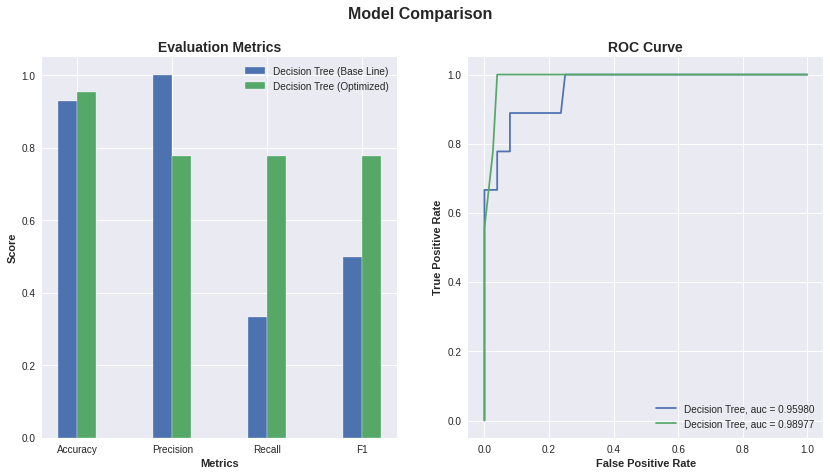

Change of 2.53% on accuracy.
Change of -22.22% on precision.
Change of 133.33% on recall.
Change of 55.56% on F1 score.
Change of 3.12% on AUC.


In [29]:
# Intitialize figure with two plots
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Model Comparison', fontsize=16, fontweight='bold')
fig.set_figheight(7)
fig.set_figwidth(14)
fig.set_facecolor('white')

# First plot
## set bar size
barWidth = 0.2
rf_score = [rf_eval['acc'], rf_eval['prec'], rf_eval['rec'], rf_eval['f1']]
best_grid_score = [best_grid_eval['acc'], best_grid_eval['prec'], best_grid_eval['rec'], best_grid_eval['f1']]

## Set position of bar on X axis
r1 = np.arange(len(rf_score))
r2 = [x + barWidth for x in r1]

## Make the plot
ax1.bar(r1, rf_score, width=barWidth, edgecolor='white', label='Decision Tree (Base Line)')
ax1.bar(r2, best_grid_score, width=barWidth, edgecolor='white', label='Decision Tree (Optimized)')

## Add xticks on the middle of the group bars
ax1.set_xlabel('Metrics', fontweight='bold')
labels = ['Accuracy', 'Precision', 'Recall', 'F1']
ax1.set_xticks([r + (barWidth * 0.5) for r in range(len(dtc_score))], )
ax1.set_xticklabels(labels)
ax1.set_ylabel('Score', fontweight='bold')
# ax1.set_ylim(0, 1)

## Create legend & Show graphic
ax1.set_title('Evaluation Metrics', fontsize=14, fontweight='bold')
ax1.legend()

# Second plot
## Comparing ROC Curve
ax2.plot(rf_eval['fpr'], rf_eval['tpr'], label='Decision Tree, auc = {:0.5f}'.format(rf_eval['auc']))
ax2.plot(best_grid_eval['fpr'], best_grid_eval['tpr'], label='Decision Tree, auc = {:0.5f}'.format(best_grid_eval['auc']))

ax2.set_title('ROC Curve', fontsize=14, fontweight='bold')
ax2.set_xlabel('False Positive Rate', fontweight='bold')
ax2.set_ylabel('True Positive Rate', fontweight='bold')
ax2.legend(loc=4)

plt.show()

print('Change of {:0.2f}% on accuracy.'.format(100 * ((best_grid_eval['acc'] - rf_eval['acc']) / rf_eval['acc'])))
print('Change of {:0.2f}% on precision.'.format(100 * ((best_grid_eval['prec'] - rf_eval['prec']) / rf_eval['prec'])))
print('Change of {:0.2f}% on recall.'.format(100 * ((best_grid_eval['rec'] - rf_eval['rec']) / rf_eval['rec'])))
print('Change of {:0.2f}% on F1 score.'.format(100 * ((best_grid_eval['f1'] - rf_eval['f1']) / rf_eval['f1'])))
print('Change of {:0.2f}% on AUC.'.format(100 * ((best_grid_eval['auc'] - rf_eval['auc']) / rf_eval['auc'])))

# Predict

In [30]:
# Predict test dataset to find optimal autonomous district
pred = best_grid.predict(X_scaled_test)

In [31]:
df_test['pred'] = pred

In [32]:
df_1 = df_test[df_test['pred']==1]
df_1

,서울시 구,가구원수,면적,반려동물 가구수,반려동물 가구밀도,폐사안락사수,폐사안락사 비율,보호소 수,보호소 밀도,동물병원약국개수,동물병원약국 밀도,pred
0,송파구,255766,18,55233,3068.500000,369,20.500000,26,1.444444,207,11.500000,1
8,마포구,160681,15,34698,2313.200000,256,17.066667,16,1.066667,139,9.266667,1
10,광진구,152090,11,32843,2985.727273,270,24.545455,15,1.363636,113,10.272727,1
11,중구,55093,2,10514,5257.000000,133,66.500000,11,5.500000,88,44.000000,1
13,성북구,179660,13,31072,2390.153846,411,31.615385,20,1.538462,137,10.538462,1
14,관악구,248959,18,41317,2295.388889,229,12.722222,21,1.166667,140,7.777778,1
18,동작구,167766,7,35392,5056.000000,140,20.000000,15,2.142857,98,14.000000,1
19,동대문구,150373,8,23752,2969.000000,589,73.625000,14,1.750000,87,10.875000,1


In [33]:
df_0 = df_test[df_test['pred']==0]
df_0

,서울시 구,가구원수,면적,반려동물 가구수,반려동물 가구밀도,폐사안락사수,폐사안락사 비율,보호소 수,보호소 밀도,동물병원약국개수,동물병원약국 밀도,pred
1,구로구,164083,14,31988,2284.857143,6,0.428571,5,0.357143,101,7.214286,0
2,금천구,103432,8,18509,2313.625000,0,0.000000,0,0.000000,58,7.250000,0
3,강서구,244097,30,49785,1659.500000,0,0.000000,0,0.000000,144,4.800000,0
4,종로구,63414,17,11850,697.058824,243,14.294118,16,0.941176,111,6.529412,0
5,은평구,190631,21,35257,1678.904762,0,0.000000,0,0.000000,94,4.476190,0
6,강동구,177148,15,34002,2266.800000,123,8.200000,18,1.200000,131,8.733333,0
7,강남구,208833,30,44682,1489.400000,0,0.000000,0,0.000000,176,5.866667,0
9,노원구,202695,25,48231,1929.240000,233,9.320000,19,0.760000,137,5.480000,0
12,성동구,122186,8,23328,2916.000000,0,0.000000,0,0.000000,109,13.625000,0
15,서대문구,133112,11,26348,2395.272727,0,0.000000,0,0.000000,88,8.000000,0


In [34]:
df_1['동물병원약국 밀도'].describe()

count     8.000000
mean     14.778829
std      11.941275
min       7.777778
25%      10.021212
50%      10.706731
75%      12.125000
max      44.000000
Name: 동물병원약국 밀도, dtype: float64

In [35]:
df_0['동물병원약국 밀도'].describe()

count    17.000000
mean      8.054061
std       3.897313
min       3.810811
25%       5.866667
50%       7.214286
75%       8.733333
max      19.750000
Name: 동물병원약국 밀도, dtype: float64

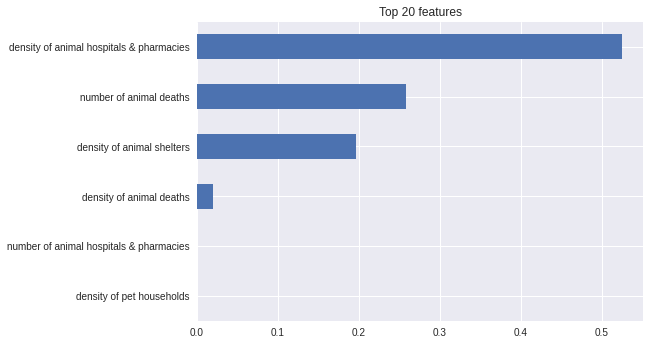

In [36]:
col_names = ['density of pet households', 
             'number of animal deaths', 
             'density of animal deaths',  
             'density of animal shelters', 
             'number of animal hospitals & pharmacies', 
             'density of animal hospitals & pharmacies']

importances = pd.Series(best_grid.feature_importances_, col_names)

n=20
plt.title(f'Top {n} features')
importances.sort_values().plot.barh()


In [37]:
X_test.columns

Index(['면적', '반려동물 가구밀도', '폐사안락사 비율', '보호소 밀도', '동물병원약국개수', '동물병원약국 밀도'], dtype='object')

In [38]:
# Songpa-gu
# Mapo-gu
# Gwangjin-gu
# Jung-gu
# Seongbuk-gu
# Gwanak-gu
# Dongjak-gu
# Dongdaemun-gu